In this project I will analyse Hate Crime Data in the US. The data is available at  
https://ucr.fbi.gov/hate-crime/2015/tables-and-data-declarations/5tabledatadecpdf and  
https://ucr.fbi.gov/hate-crime/2015/tables-and-data-declarations/10tabledatadecpdf  

In [669]:
library(ggplot2)
library(tidyverse)
library(tidyr)
library(dplyr, quietly = T)
library(ggridges)
library(ggrepel)
library(ggbeeswarm)
library(xlsx)
library(ggraph)
library(viridis)
library(igraph)

In [670]:
convert <- function(f){
    as.numeric(gsub(",", "", levels(f)))[f]
}

In [671]:
df.1 <- read.csv('./table_5_offenses_known_offenders_race_and_ethnicity_by_bias_motivation_2015.csv', 
                 skip = 4, header=FALSE, stringsAsFactors = TRUE, dec = '.')
head(df.1)
df.1 <- head(df.1 , -2)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
Bias motivation,Total offenses,Known offender's race,,,,,,,Known offender's ethnicity1,,,,Unknown offender
,,White,Black or African American,American Indian or Alaska Native,Asian,Native Hawaiian or Other Pacific Islander,Group of multiple races,Unknown race,Hispanic or Latino,Not Hispanic or Latino,Group of multiple ethnicities,Unknown ethnicity,
Total,"6,885","2,761","1,129",65,60,7,304,842,182,875,27,"2,158","1,717"
Single-Bias Incidents,"6,837","2,744","1,126",63,60,7,304,840,182,866,27,"2,151","1,693"
Race/Ethnicity/Ancestry:,"4,029","1,833",646,58,41,5,175,391,102,563,5,"1,463",880
Anti-White,734,144,339,17,5,0,26,67,8,114,1,334,136


In [680]:
rownames <- tail(df.1, -2) %>% select(V1)
colnames <- c("bias.motivation", "Total offenses", "White", "Black or African American",
              "American Indian or Alaska Native", "Asian", 
              "Native Hawaiian or Other Pacific Islander", "Group of multiple races",
              "Unknown race", "Hispanic or Latino", "Not Hispanic or Latino", "Group of multiple ethnicities",
              "Unknown ethnicity", "Unknown offender")

tidy_df <- tail(df.1, -2)  %>% mutate_if(is.factor, convert) %>% mutate(V1 = rownames[, 1])
colnames(tidy_df) <- colnames
head(tidy_df)

Warning message in convert(V1):
"в результате преобразования созданы NA"Warning message in convert(V2):
"в результате преобразования созданы NA"Warning message in convert(V3):
"в результате преобразования созданы NA"Warning message in convert(V4):
"в результате преобразования созданы NA"Warning message in convert(V5):
"в результате преобразования созданы NA"Warning message in convert(V6):
"в результате преобразования созданы NA"Warning message in convert(V7):
"в результате преобразования созданы NA"Warning message in convert(V8):
"в результате преобразования созданы NA"Warning message in convert(V9):
"в результате преобразования созданы NA"Warning message in convert(V10):
"в результате преобразования созданы NA"Warning message in convert(V11):
"в результате преобразования созданы NA"Warning message in convert(V12):
"в результате преобразования созданы NA"Warning message in convert(V13):
"в результате преобразования созданы NA"Warning message in convert(V14):
"в результате преобразовани

bias.motivation,Total offenses,White,Black or African American,American Indian or Alaska Native,Asian,Native Hawaiian or Other Pacific Islander,Group of multiple races,Unknown race,Hispanic or Latino,Not Hispanic or Latino,Group of multiple ethnicities,Unknown ethnicity,Unknown offender
Total,6885,2761,1129,65,60,7,304,842,182,875,27,2158,1717
Single-Bias Incidents,6837,2744,1126,63,60,7,304,840,182,866,27,2151,1693
Race/Ethnicity/Ancestry:,4029,1833,646,58,41,5,175,391,102,563,5,1463,880
Anti-White,734,144,339,17,5,0,26,67,8,114,1,334,136
Anti-Black or African American,2125,1227,72,23,22,0,97,202,69,259,4,756,482
Anti-American Indian or Alaska Native,137,37,33,11,1,0,1,9,1,3,0,79,45


In [673]:
races <- tidy_df %>% select(-c("Total offenses", "Unknown offender")) %>% select(-c(10, 11, 12)) %>%
filter(bias.motivation == "Race/Ethnicity/Ancestry:" | bias.motivation == "Religion:" |
      bias.motivation == "Sexual Orientation:" | bias.motivation == "Disability:" |
      bias.motivation == "Gender:" | bias.motivation == "Gender Identity:")

head(races)
races <- data.frame(races[1], stack(races[2:ncol(races)]))
colnames(races)[2:3] <- c('value', 'race')
races <- races %>% mutate_at(vars(bias.motivation), funs(stringr::str_replace_all(., ":", "")))
head(races)

bias.motivation,White,Black or African American,American Indian or Alaska Native,Asian,Native Hawaiian or Other Pacific Islander,Group of multiple races,Unknown race,Hispanic or Latino
Race/Ethnicity/Ancestry:,1833,646,58,41,5,175,391,102
Religion:,346,89,1,7,2,28,316,8
Sexual Orientation:,481,332,3,10,0,83,109,58
Disability:,38,15,1,1,0,8,9,1
Gender:,12,6,0,0,0,0,4,5
Gender Identity:,34,38,0,1,0,10,11,8


bias.motivation,value,race
Race/Ethnicity/Ancestry,1833,White
Religion,346,White
Sexual Orientation,481,White
Disability,38,White
Gender,12,White
Gender Identity,34,White


In [674]:
population_df <- read.csv('./population_data.csv', header = T, skip = 2) %>% head(n = -10) %>% 
select(-Footnotes) %>% rename('Black or African American' = Black, 
                              'American Indian or Alaska Native' = American.Indian.Alaska.Native,
                              'Native Hawaiian or Other Pacific Islander' = Native.Hawaiian.Other.Pacific.Islander,
                              'Group of multiple races' = Two.Or.More.Races) %>%
as.data.frame()
head(population_df)
races_counts <- population_df[1, -1]
races_counts

Location,White,Black or African American,Hispanic,Asian,American Indian or Alaska Native,Native Hawaiian or Other Pacific Islander,Group of multiple races,Total
United States,192593600,37923800,55241300,16755300,1986900,466400,7810600,312777900
Alabama,3131400,1251500,188000,55300,16300,N/A,86500,4730100
Alaska,435400,22900,47600,49000,98700,2800,51000,707500
Arizona,3714900,264200,2045900,207300,270800,8900,143100,6655100
Arkansas,2106000,446400,204300,39000,18000,6100,62600,2882300
California,14503600,2084000,14903200,5405400,130000,138000,1161000,38325100


White,Black or African American,Hispanic,Asian,American Indian or Alaska Native,Native Hawaiian or Other Pacific Islander,Group of multiple races,Total
192593600,37923800,55241300,16755300,1986900,466400,7810600,312777900


In [681]:
norm_w <- races %>% filter(race=='White') %>% mutate(norm_value = value / races_counts[['White']])

norm_b <- races %>% filter(race=='Black or African American') %>%
mutate(norm_value = value / as.numeric(races_counts[['Black or African American']]))

norm_i <- races %>% filter(race=='American Indian or Alaska Native') %>%
mutate(norm_value = value / as.numeric(races_counts[['American Indian or Alaska Native']]))

norm_n <- races %>% filter(race=='Native Hawaiian or Other Pacific Islander') %>%
mutate(norm_value = value / as.numeric(races_counts[['Native Hawaiian or Other Pacific Islander']]))

norm_m <- races %>% filter(race=='Group of multiple races') %>%
mutate(norm_value = value / as.numeric(races_counts[['Group of multiple races']]))

norm_a <- races %>% filter(race=='Asian') %>%
mutate(norm_value = value / as.numeric(races_counts[['Asian']]))

norm_h <- races %>% filter(race=='Hispanic or Latino') %>%
mutate(norm_value = value / as.numeric(races_counts[['Hispanic']]))

races <- rbind(norm_w, norm_b, norm_i, norm_n, norm_m, norm_a, norm_h)
sums <- races %>% group_by(bias.motivation) %>% summarize(sum(norm_value)) %>%
rename(s = 'sum(norm_value)', bm = 'bias.motivation') %>%
arrange(desc(s))
sums <- sums %>% mutate(i = row_number())
sums

head(races)

bm,s,i
Race/Ethnicity/Ancestry,6.623195e+00,1
Sexual Orientation,9.271484e-01,2
Religion,7.577677e-01,3
Disability,1.295563e-01,4
Gender Identity,7.692568e-02,5
Gender,3.110314e-07,6


bias.motivation,value,race,norm_value
Race/Ethnicity/Ancestry,1833,White,9.517450e-06
Religion,346,White,1.796529e-06
Sexual Orientation,481,White,2.497487e-06
Disability,38,White,1.973067e-07
Gender,12,White,6.230737e-08
Gender Identity,34,White,1.765375e-07


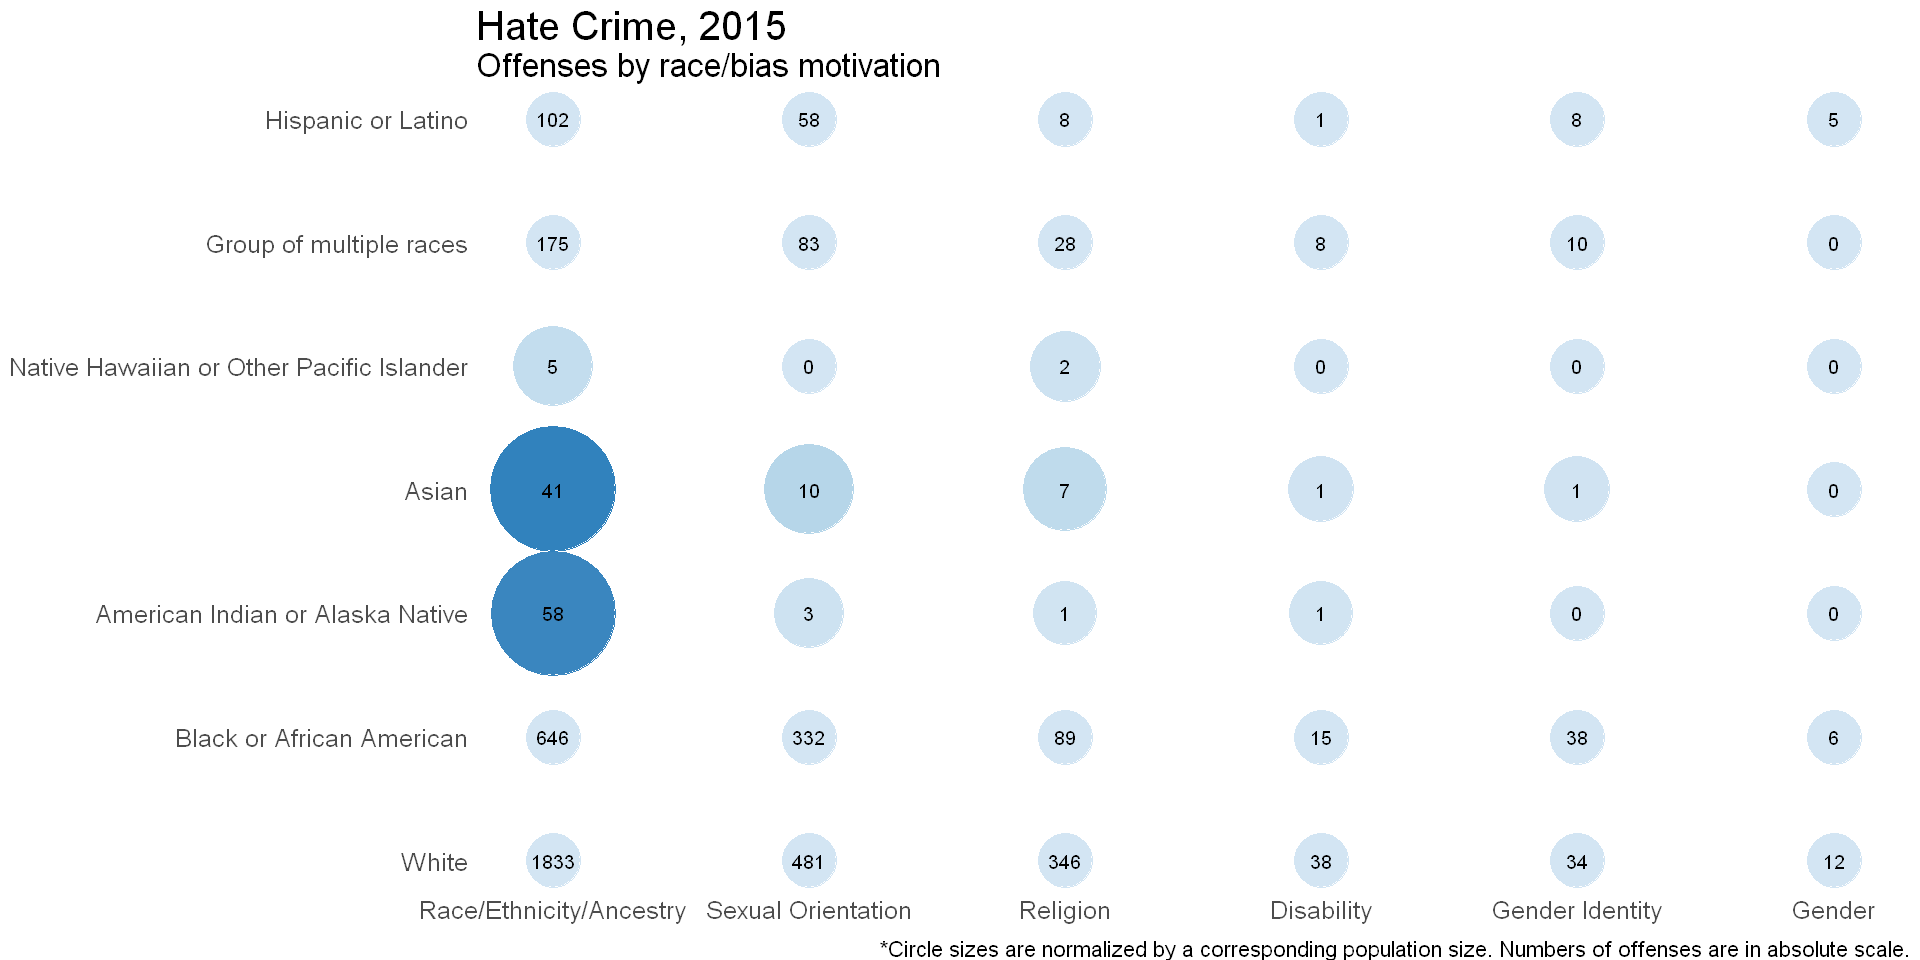

In [682]:
# x = reorder(bias.motivation,
#                              X = bias.motivation,
#                              FUN = function(x){sums %>% mutate(i = row_number()) %>% 
#                                                filter(bm==x) %>% select(i) %>% as.numeric()})

options(repr.plot.width = 16, repr.plot.height = 8.0)
ggplot(races, aes(y = race, x = factor(bias.motivation, levels = sums$bm), 
                  color = norm_value, size = norm_value)) + 
geom_point() +
scale_color_gradient2(low = '#deebf7', mid = '#9ecae1', high = '#3182bd', midpoint = mean(sums$s))+
scale_size_continuous(range = c(15, 35)) +
scale_x_discrete(expand = c(0.05, 0.05)) +
scale_y_discrete(expand = c(0.035, 0.035)) +
geom_text(aes(label = value), color = 'black', size = 4) +
theme_minimal() +
theme(axis.text = element_text(size = 15), 
      axis.title = element_blank(), 
      legend.position = "none",
      panel.grid = element_blank(),
      title = element_text(size = 20),
      axis.text.x = element_text(angle = 0),
     plot.caption = element_text(size = 13, vjust = -1.8)) + 
labs(title = "Hate Crime, 2015", subtitle = "Offenses by race/bias motivation", 
caption = "*Circle sizes are normalized by a corresponding population size. Numbers of offenses are in absolute scale.") 

In [706]:
df.2 <- read.csv('./table_10_incidents_bias_motivation_by_location_2015.csv',
                 skip = 7, header=FALSE, stringsAsFactors = TRUE, dec = '.')
df.2 <- head(df.2 , -2)
head(df.2, 10)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"incomplete final line found by readTableHeader on './table_10_incidents_bias_motivation_by_location_2015.csv'"

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
,,Race/ Ethnicity/ Ancestry,Religion,Sexual orientation,Disability,Gender,Gender Identity,NA,NA,NA
Total,"5,850","3,310","1,244","1,053",74,23,114,32,NA,NA
Abandoned/condemned structure,5,2,3,0,0,0,0,0,NA,NA
Air/bus/train terminal,82,57,9,15,0,0,0,1,NA,NA
Amusement park,1,1,0,0,0,0,0,0,NA,NA
Arena/stadium/fairgrounds/coliseum,7,4,1,1,0,0,1,0,NA,NA
ATM separate from bank,1,1,0,0,0,0,0,0,NA,NA
Auto dealership new/used,4,1,2,1,0,0,0,0,NA,NA
Bank/savings and loan,12,7,1,1,0,0,2,1,NA,NA
Bar/nightclub,99,55,9,32,0,0,3,0,NA,NA


In [707]:
rownames <- tail(df.2, -1) %>% select(V1)
colnames <- c("Location", "total.incidents", "Race/ Ethnicity/ Ancestry", "Religion", "Sexual orientation",
              "Disability", "Gender", 
              "Gender Identity", "Multiple-bias incidents")

tidy_df2 <- tail(df.2, -1)  %>% mutate_if(is.factor, convert) %>% mutate(V1 = rownames[, 1]) %>% select(-c(10, 11))
colnames(tidy_df2) <- colnames
head(tidy_df2)

Warning message in convert(V1):
"в результате преобразования созданы NA"Warning message in convert(V3):
"в результате преобразования созданы NA"Warning message in convert(V4):
"в результате преобразования созданы NA"Warning message in convert(V5):
"в результате преобразования созданы NA"Warning message in convert(V6):
"в результате преобразования созданы NA"Warning message in convert(V7):
"в результате преобразования созданы NA"Warning message in convert(V8):
"в результате преобразования созданы NA"

Location,total.incidents,Race/ Ethnicity/ Ancestry,Religion,Sexual orientation,Disability,Gender,Gender Identity,Multiple-bias incidents
Total,5850,3310,1244,1053,74,23,114,32
Abandoned/condemned structure,5,2,3,0,0,0,0,0
Air/bus/train terminal,82,57,9,15,0,0,0,1
Amusement park,1,1,0,0,0,0,0,0
Arena/stadium/fairgrounds/coliseum,7,4,1,1,0,0,1,0
ATM separate from bank,1,1,0,0,0,0,0,0


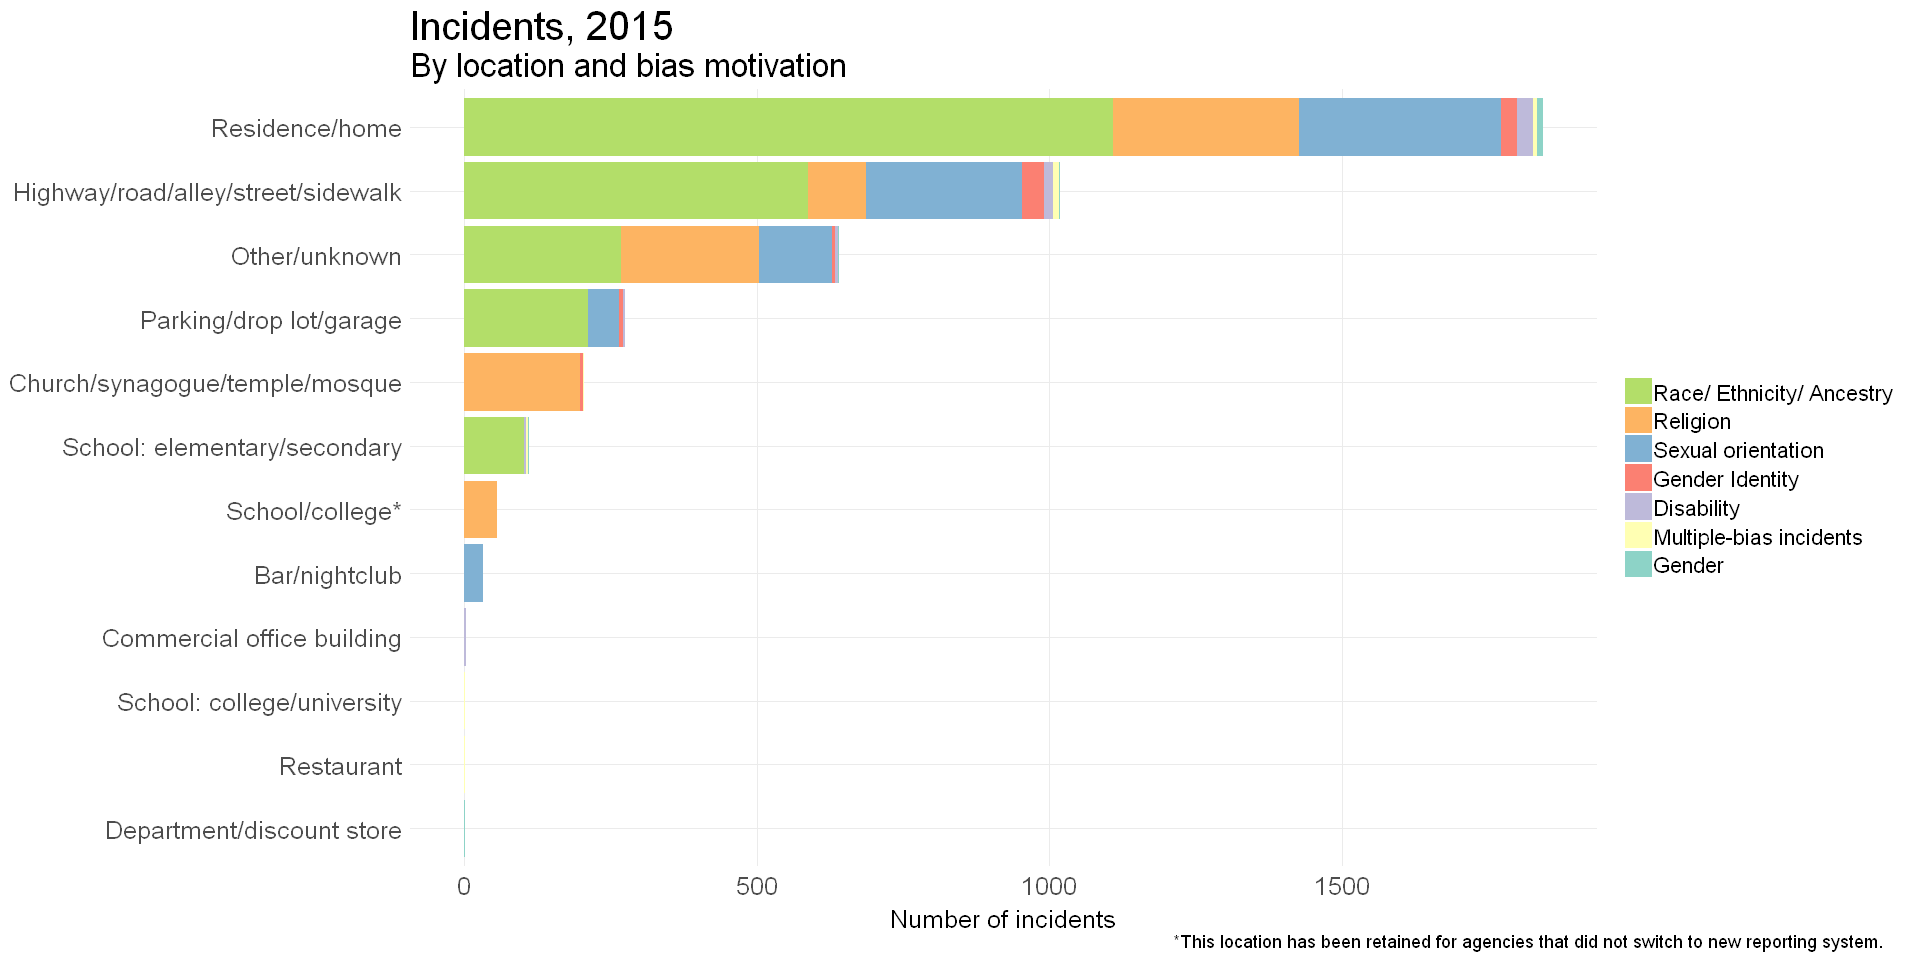

In [741]:
places <- tidy_df2 %>% select(-c(total.incidents))

places <- data.frame(places[1], stack(places[2:ncol(places)]))
colnames(places)[2:3] <- c('value', 'bias')


top5 <- places %>% filter(Location != "Total") %>% 
group_by(bias) %>% 
arrange(desc(value), .by_group = TRUE) %>% 
top_n(5, wt = value) %>%
ungroup()

ggplot(top5, aes(x=reorder(Location, X = value, FUN = function(x) sum(x)), 
                           y=value, 
                           fill=reorder(bias, 
                                        X = value,
                                        FUN = function(x) sum(x)))) +
geom_bar(stat = "identity") + 
scale_fill_manual(values = c('#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69')) +
coord_flip() +
guides(fill = guide_legend(reverse = TRUE)) +
theme_minimal() +
theme(axis.text = element_text(size = 15),
      legend.text = element_text(size = 13),
      axis.title.y = element_blank(),
      axis.title.x = element_text(size = 15, vjust = -1),
      panel.grid.minor.y = element_blank(),
      panel.grid.minor.x = element_blank(),
      legend.title = element_blank(),
      title = element_text(size = 20),
      plot.caption = element_text(size = 11, hjust = 1.6)) +
labs(title = "Incidents, 2015", subtitle = "By location and bias motivation",  
     caption = "*This location has been retained for agencies that did not switch to new reporting system.",
     y = "Number of incidents")